
# **Import Libraries and Dataset Overview**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("inpatientCharges.csv")
df.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


## ***Dataset Dictionary***

- ***DRG(Diagnosis Related Group):*** is a payment ***category*** that is used to classify patients for the purpose of reimbursing hospitals for each case in a given category with a fixed fee 
    DRG is based on:
        1. The principal ICD-9-CM diagnosis code
        2. ICD-9-CM surgical procedure code
        3. Age of patient
        4. Expected length of stay in the hospital



- ***Total discharges:*** The number of discharges billed by the provider for inpatient hospital services. When you leave a hospital after treatment, you go through a process called hospital discharge.

- ***Covered Charges:*** Charges for covered services that your health plan paid for. There may be a limit on covered charges if you receive services from providers outside your plan's network of providers. Covered Person - Any person covered under the plan. Covered Service - A healthcare provider’s service or medical supplies covered by your health plan. Benefits will be given for these services based on your plan.

- ***Total Covered Charge Amount*** = the sum of all covered charges
 
- ***Average Covered Charges*** = Total Covered Charge Amount / Total Discharges

Payment is the amount a hospital actually receives for providing patient care. This is the actual amount paid to a hospital by consumers, insurers or governments. The sources of payment are:
1. Medicare and Medicaid
2. Private insurer if any 
3. The Patient

- ***Average Total Payments*** = Total Payments / Total Discharges
- ***Average Medicare Payments*** = Medicare Payment Amount / Total Discharges

## ***Modify Columns***

In [3]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DRG                            163065 non-null  object
 1   Provider_Id                    163065 non-null  int64 
 2   Provider_Name                  163065 non-null  object
 3   Provider_StreetAddress         163065 non-null  object
 4   Provider_City                  163065 non-null  object
 5   Provider_State                 163065 non-null  object
 6   Provider_Zipcode               163065 non-null  int64 
 7   Hospital_referral_region_desp  163065 non-null  object
 8   Total_Discharges               163065 non-null  int64 
 9   Average_Total_Payments         163065 non-null  object
 10  Average_Medicare_Payment       163065 non-null  object
dtypes: int64(3), object(8)
memory usage: 13.7+ MB


## ***Change Datatypes***

In [5]:
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments'].str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment'].str.replace(r'[^-+\d.]', '').astype(float))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


In [7]:
df.isnull().sum()

DRG                              0
Provider_Id                      0
Provider_Name                    0
Provider_StreetAddress           0
Provider_City                    0
Provider_State                   0
Provider_Zipcode                 0
Hospital_referral_region_desp    0
Total_Discharges                 0
Average_Total_Payments           0
Average_Medicare_Payment         0
dtype: int64

In [8]:
df.shape

(163065, 11)

## ***New Dataset***

In [9]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


# **Feature Engineering**

## ***Feature 1: State DRG & Payment Mean***

Grouping data by 'Provider_State' and 'DRG' columns and finding mean of 'Average_Total_Payments' column


In [10]:
df['Average_Total_Payments_by_state'] = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments'].transform('mean')
df.head(2)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739


***Summary:***

If a provider in a particular state has a higher average payment, it suggests that the state may be utilizing resources in a manner that exceeds the average of other providers within the same state and DRG category.

## ***Feature 2: State DRG & payment std***

Group the DataFrame by Provider_State and DRG, then calculate the standard deviation of Average_Total_Payments


In [11]:
df['Std_Total_Payments_by_state'] = df.groupby(['Provider_State', 'DRG'])['Average_Total_Payments'].transform('std')
df.head(2)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608


In [31]:
# Replace the null values with 0
df['Std_Total_Payments_by_state'].fillna(0, inplace=True)

# Check the number of null values after replacement (should be 0)
df['Std_Total_Payments_by_state'].isnull().sum()

0

***Summary:***

If a provider in a specific state has both a higher average payment and a higher standard deviation in payments, it indicates that the state may not only be utilizing resources differently from its peers in the same DRG and state but also experiencing greater variation or inconsistency in payment patterns.

## ***Feature 3: State DRG & Medicare Payment Mean***

Group the DataFrame by 'Provider_State' and 'DRG', then calculate the mean of 'Average_Medicare_Payment'.


In [12]:
df['Average_Medicare_Payments_by_state'] = df.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].transform('mean')
df.head(2)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043


***Summary:***
If a provider in a particular state has a higher medicare payment, it suggests that the state may be utilizing medicare resources in a manner that exceeds the average of other providers within the same state and DRG category.

## ***Feature 4: State DRG & Medicare Payment std***

Feature 4 groups the data by state and DRG (diagnosis-related group), and calculates the standard deviation of Medicare payments for each group. It then creates a new dataframe with three columns: Provider_State, DRG, and Medicare_std_ByStateDRG. The output is a table with 5100 rows and 3 columns, showing the standard deviation of Medicare payments for each state and DRG combination. NaN indicates that there is no data available for that particular combination of state and DRG.

In [13]:
df['Std_Medicare_Payments_by_state'] = df.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].transform('std')
df.head(2)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654


In [32]:
# Replace the null values with 0
df['Std_Medicare_Payments_by_state'].fillna(0, inplace=True)

# Check the number of null values after replacement (should be 0)
df['Std_Medicare_Payments_by_state'].isnull().sum()

0

***Summary:***

If a provider in a specific state has both a higher medicare payment and a higher standard deviation in payments, it indicates that the state may not only be utilizing resources differently from its peers in the same DRG and state but also experiencing greater variation or inconsistency in payment patterns.


## ***Feature 5: Provider Location, City***

In this focal cell, the code is focused on identifying the top 100 provider cities based on how frequently they appear in the data. The code starts by getting a list of the top 100 provider cities using value_counts() and nlargest(). It then creates a new column called 'High_Provider_Location' in the original dataset df which indicates whether a provider's city is one of the top 100 provider cities.

In [19]:
top_provider_locations = df['Provider_City'].value_counts().nlargest(100).index
top_provider_locations
df['Is_Top_Provider_Location'] = df['Provider_City'].isin(top_provider_locations).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0


- 0 stands for the city is not a top_provider location, while 1 stands for the city is a top_provider location.

***Summary:***

Unusually high concentrations of providers in specific areas can indicate potential fraud schemes such as kickbacks or collusion. Known fraud hotspots, identified through historical data and investigations, can help pinpoint locations where fraud is more prevalent. Unusual provider density within a location may suggest fraudulent activities like phantom clinics or the use of fake addresses.

## ***Feature 6: Unusual Variation in Total Discharges***

This code creates a new feature called "Unusual_Variation_Total_Discharges" by using a lambda function that standardizes the Total Discharges column and categorizes them as True or False based on whether they are more than two standard deviations away from the mean. The resulting dataframe shows the list of provider cities and whether or not they have unusually high variations in total discharges.

In [22]:
Unusual_Variation_Total_Discharges = df['Total_Discharges'].transform(lambda x: (x - x.mean()) / x.std()) > 2
Unusual_Variation_Total_Discharges
df['Unusual_Variation_Total_Discharges'] = df['Total_Discharges'].isin(Unusual_Variation_Total_Discharges).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0,0


***Summary:***

Providers who engage in fraudulent activities may manipulate the number of discharges to inflate claims or engage in unnecessary procedures. Unusual variations in total discharges compared to their peers in the same DRG and state can indicate potential fraud, warranting further investigation. 

## ***Feature 7: Provider Billing Patterns***

In this code, we are creating a new feature called "Inconsistent_Billing_Patterns". We are grouping the dataset by DRG (diagnosis-related group) and Provider_City and then applying a lambda function to determine if the number of unique Provider Names is greater than 1. If true, then that means the providers in that city are billing inconsistently, which could indicate potential fraudulent activity.

In [23]:
Inconsistent_Billing_Patterns = df.groupby(['DRG', 'Provider_City'])['Provider_Name'].transform(lambda x: x.nunique() > 1)
Inconsistent_Billing_Patterns
df['Inconsistent_Billing_Patterns'] = df['Provider_Name'].isin(Inconsistent_Billing_Patterns).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0,0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0,0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1,0,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1,0,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0,0,0


***Summary:***

Providers who engage in fraudulent activities often exhibit inconsistent billing patterns, such as billing for services not rendered or upcoding procedures to receive higher reimbursements. By examining billing patterns within specific DRGs and states, discrepancies can be identified that may indicate potential fraud.

## ***Feature 8:  Changes in Payment Trends***
In this code, a new feature called "Payment_Trend_Change" is being created. The dataset is being grouped by Provider_Id, and then a lambda function is applied to determine if the difference between the current row and the previous row value for Average_Total_Payments is greater than 0. If true, then that means the payment trend for that provider is increasing, otherwise, it is not changing or decreasing. The resulting dataframe only includes the columns Provider_Id, Average_Total_Payments, and Payment_Trend_Change.

In [24]:
Payment_Trend_Change = df.groupby(['Provider_Id'])['Average_Total_Payments'].transform(lambda x: x.diff() > 0)
Payment_Trend_Change
df['Payment_Trend_Change'] = df['Average_Total_Payments'].isin(Payment_Trend_Change).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0


***Summary:***

Providers engaged in fraudulent activities often adapt their billing strategies to avoid detection, resulting in sudden changes in payment trends. These changes may include significant increases or decreases in average payments or deviations from expected payment patterns within specific DRGs and states.

## ***Feature 9:  Unusual Provider Relationships***
The dataset is grouped by Provider_Name, and then a lambda function is applied to determine if the number of unique Provider_Id values for a given Provider_Name is greater than 1. If true, then that means there are unusual relationships between providers with the same name, otherwise, there are no unusual relationships.

In [25]:
Unusual_Provider_Relationships = df.groupby(['Provider_Name'])['Provider_Id'].transform(lambda x: x.nunique() > 1)
Unusual_Provider_Relationships
df['Unusual_Provider_Relationships'] = df['Provider_Id'].isin(Unusual_Provider_Relationships).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0


***Summary:***

Fraudulent providers often establish relationships with other providers, such as kickback arrangements or collusion networks, to engage in fraudulent activities. By analyzing the frequency and nature of provider relationships within specific DRGs and states, unusual patterns can be identified. 

## ***Feature 10: Provider Concentration***

Set a new column for concentration of providers by grouping DRG and Provider_State columns


In [26]:
Provider_Concentration = df.groupby(['DRG', 'Provider_State'])['Total_Discharges'].transform(lambda x: x / x.sum())
Provider_Concentration
df['Provider_Concentration'] = df['Total_Discharges'].isin(Provider_Concentration).astype(int)
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,...,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,...,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,...,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0,0
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,...,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0,0
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,...,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0


***Summary:***

Fraudulent providers often exploit such concentrations to engage in fraudulent activities, such as billing for unnecessary services or collaborating in fraudulent schemes. By analyzing the distribution of providers within specific DRGs and states, areas with abnormally high provider concentration can be identified

## Drop the non-numerical features

### New df

In [27]:
df = df.drop(['DRG','Provider_Name','Provider_StreetAddress','Provider_City','Provider_State','Hospital_referral_region_desp'], axis=1)
df.head()

,Provider_Id,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration
0,10001,36301,91,5777.24,4763.73,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0
1,10005,35957,14,5787.57,4976.71,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0
2,10006,35631,24,5434.95,4453.79,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0,0
3,10011,35235,25,5417.56,4129.16,5743.611739,628.702608,4599.593043,495.053654,1,0,0,0,0,0
4,10016,35007,18,5658.33,4851.44,5743.611739,628.702608,4599.593043,495.053654,0,0,0,0,0,0


In [29]:
df.shape

(163065, 15)

In [33]:
df.isnull().sum()

Provider_Id                           0
Provider_Zipcode                      0
Total_Discharges                      0
Average_Total_Payments                0
Average_Medicare_Payment              0
Average_Total_Payments_by_state       0
Std_Total_Payments_by_state           0
Average_Medicare_Payments_by_state    0
Std_Medicare_Payments_by_state        0
Is_Top_Provider_Location              0
Unusual_Variation_Total_Discharges    0
Inconsistent_Billing_Patterns         0
Payment_Trend_Change                  0
Unusual_Provider_Relationships        0
Provider_Concentration                0
dtype: int64

# ***PCA***

## Train-test split

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.utils.data import generate_data
from pyod.utils.utility import standardizer

# Split the data into training and test sets using train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Convert the training and test data to pandas DataFrames 
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

## Build the model

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.pca import PCA

pca_model = PCA(n_components=2, contamination=0.05) 
pca_model.fit(X_train)

# Generate PCA scores for the training and test data
y_train_scores = pca_model.decision_function(X_train)
y_test_scores = pca_model.decision_function(X_test)

# The PCA scores are now stored in 'y_train_scores' and 'y_test_scores'
print("PCA scores for the training data:")
print(y_train_scores)

print("\nPCA scores for the test data:")
print(y_test_scores)

PCA scores for the training data:
[64.52556121 22.31292479 14.88018664 ... 27.35136211 19.69958535
 24.81649055]

PCA scores for the test data:
[37.84418146 28.96491304 25.78230062 ... 23.21333268 24.29473363
 22.67606251]


In [78]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("Training data - Outlier Count:", count_stat(y_train_pred))
print("Test data - Outlier Count:", count_stat(y_test_pred))
# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:", pca_model.threshold_)

Training data - Outlier Count: {0: 130452}
Test data - Outlier Count: {0: 32613}
The threshold for the defined contamination rate: 53.071415274346826


## PCA Parameters

In [82]:
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [83]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([5.59094654e+00, 1.19010208e+00, 1.04534965e+00, 9.56949402e-01,
        8.09687785e-01, 2.79386332e-01, 8.74227285e-02, 2.87270094e-02,
        1.03092235e-02, 1.19590469e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([5.59090368e-01, 1.19009296e-01, 1.04534164e-01, 9.56942067e-02,
        8.09681579e-02, 2.79384190e-02, 8.74220583e-03, 2.87267892e-03,
        1.03091445e-03, 1.19589553e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])]

## PCA Histogram auto bins

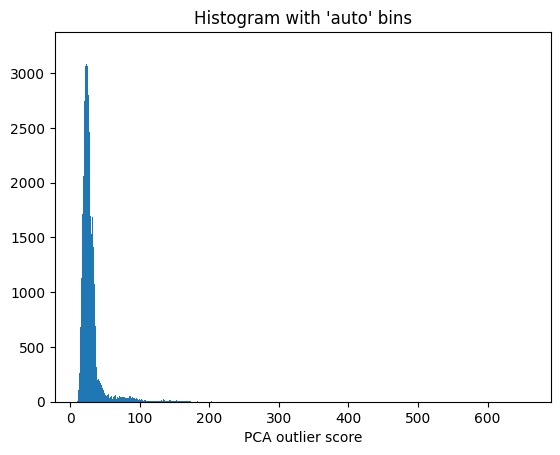

In [85]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

## PCA Threshold

In [107]:
print("The threshold for the defined comtanimation rate:" , pca_model.threshold_)

The threshold for the defined comtanimation rate: 53.071415274346826


In [109]:
threshold = pca_model.threshold_

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

## PCA Descriptive Statistics

In [88]:
descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,123929,94.999693,47750.14,41.03,8450.52,7302.60,8483.76,1613.11,7330.09,1514.67,0.27,0.0,0.0,0.0,0.0,0.0,25.79
1,Outlier,6523,5.000307,50634.30,76.43,33638.80,31196.32,32944.09,7512.37,30597.15,7019.94,0.36,0.0,0.0,0.0,0.0,0.0,90.18


In [89]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,30970,94.962132,48008.87,40.93,8449.39,7297.19,8493.35,1609.19,7340.27,1511.30,0.27,0.0,0.0,0.0,0.0,0.0,25.80
1,Outlier,1643,5.037868,50079.48,75.75,33220.62,30835.25,32642.57,7535.88,30328.56,7071.27,0.35,0.0,0.0,0.0,0.0,0.0,89.19


# ***KNN***

## Train-test split

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.utils.data import generate_data
from pyod.utils.utility import standardizer

# Split the data into training and test sets using train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Convert the training and test data to pandas DataFrames 
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

## Build the model

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN

# train kNN detector
from pyod.models.knn import KNN

knn = KNN()
knn.fit(X_train)

# Generate KNN scores for the training and test data
y_train_scores = knn.decision_function(X_train)
y_test_scores = knn.decision_function(X_test)

# The KNN scores are now stored in 'y_train_scores' and 'y_test_scores'
print("KNN scores for the training data:")
print(y_train_scores)

print("\nKNN scores for the test data:")
print(y_test_scores)

KNN scores for the training data:
[1917.9474479   634.818775    324.88258341 ...  506.91656217 1829.15672034
  257.49339506]

KNN scores for the test data:
[ 496.89755655 1317.08731146  196.30952793 ...  277.81980752  625.22784791
  966.06289718]


## KNN Parameters

In [95]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 
knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
y_test_scores = knn.decision_function(X_test)
y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 124871, 1: 5581}
The training data: {0: 30971, 1: 1642}
The threshold for the defined comtanimation rate: 2392.1241892669477


In [96]:
knn.get_params()

{'algorithm': 'auto',
 'contamination': 0.05,
 'leaf_size': 30,
 'method': 'largest',
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

## KNN Histogram auto bins

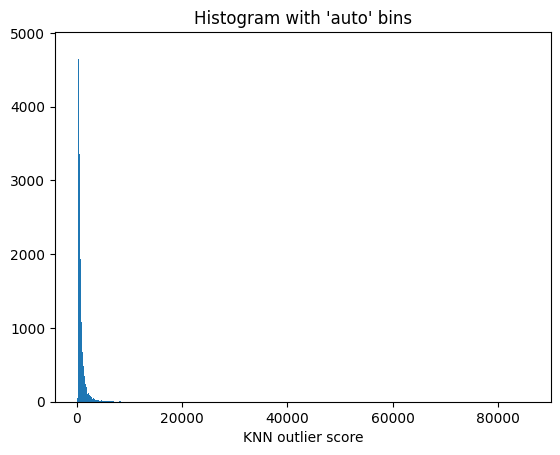

In [97]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KNN outlier score')
plt.show()

## KNN Threshold

In [98]:
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The threshold for the defined comtanimation rate: 2392.1241892669477


In [99]:
threshold = knn.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

## KNN Descriptive Statistics

In [100]:
descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,124871,95.721798,47767.95,43.33,8729.58,7617.71,8885.96,1719.64,7721.17,1616.09,0.27,0.0,0.0,0.0,0.0,0.0,638.47
1,Outlier,5581,4.278202,50722.54,31.04,31646.48,28179.04,28073.83,6124.52,25774.15,5679.96,0.42,0.0,0.0,0.0,0.0,0.0,4739.12


In [101]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,30971,94.965198,48011.64,43.30,8586.97,7478.11,8752.33,1683.59,7595.56,1584.03,0.27,0.0,0.0,0.0,0.0,0.0,673.19
1,Outlier,1642,5.034802,50028.53,31.02,30640.80,27437.01,27772.38,6136.23,25527.35,5702.94,0.40,0.0,0.0,0.0,0.0,0.0,4664.30


## KNN Averages

In [104]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 
 120, 130, 140, 150, 160, 170, 180, 190, 200]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

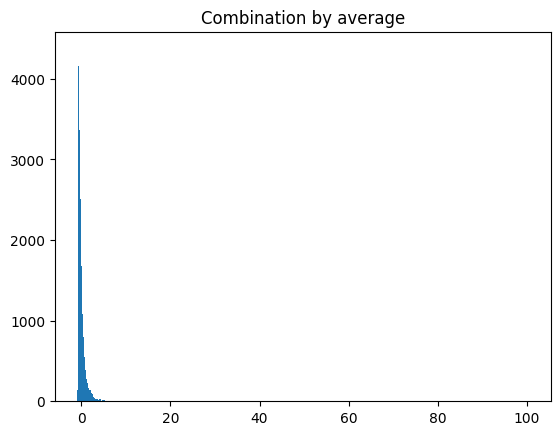

In [105]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. 
# The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [106]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.5)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,108941,83.51041,47978.14,35.88,7514.50,6441.38,7678.91,1436.96,6578.41,1361.04,0.24,0.0,0.0,0.0,0.0,0.0,-0.31
1,Outlier,21511,16.48959,47470.03,77.87,20829.01,18909.75,19977.26,4294.08,18192.45,3962.10,0.45,0.0,0.0,0.0,0.0,0.0,1.56


In [110]:
descriptive_stat_threshold(X_test,y_test_by_average, 0.5)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,27183,83.350198,48241.38,35.64,7518.02,6442.97,7694.10,1437.98,6593.50,1362.73,0.24,0.0,0.0,0.0,0.0,0.0,-0.31
1,Outlier,5430,16.649802,47471.44,77.90,20607.15,18695.55,19801.46,4259.56,18034.42,3937.38,0.45,0.0,0.0,0.0,0.0,0.0,1.53
